River Kelly
CSCI-347 
Homework 04

Show your work. Include any code snippets you used to generate an answer, using comments in the code to clearly indicate which problem corresponds to which code

# Code Setup

In [16]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Part 1 - (2 points) Matrix Vector

Consider matrix $A$ and vector $v$. Compute the matrix-vector product $Av$.

$$
  A = \begin{pmatrix} 2 & 1 \\ 1 & 3 \end{pmatrix},
  v = \begin{pmatrix}-1 & 1\end{pmatrix}
$$

In [17]:
# build matrix 'A'
A = np.ndarray(shape=(2,2), dtype=int)
A[0] = np.array([2, 1])
A[1] = np.array([1, 3])
# build vector 'v'
V = np.array([-1, 1], dtype=int)
dot_product = np.array([0] * A.shape[1])
# loop through row is matrix A
for i in range(A.shape[1]):
    # get the current row
    a_row = A[i, :]
    # loop over the values in the current row
    # and compute the dot product 
    for index, row_value in enumerate(a_row):
        # compute the dot product for i in row
        dot_product[i] += row_value * V[index]
# show the result dot pot_product
dot_product

array([-1,  2])

# Part 2

Consider matrix $A$ and data set $D$:

$$
    A = \begin{pmatrix}
        \frac{\sqrt{3}}{2} & -\frac{1}{2} \\ 
        \frac{1}{2} & \frac{\sqrt{3}}{2}
    \end{pmatrix},
    D = \begin{pmatrix}
        1  &  1.5 \\
        1  &  2 \\
        3  &  4 \\
        -1 &  -1 \\
        -1 &  1 \\
        1  & -2 \\
        2  &  2 \\
        2  & 3
    \end{pmatrix}
$$

## Helper Code

In [18]:
A = np.matrix([
    [((3**(1/2))/2), -(1/2)],
    [(1/2), ((3**(1/2))/2)]
])
# show matrix 'A'
A

matrix([[ 0.8660254, -0.5      ],
        [ 0.5      ,  0.8660254]])

In [19]:
# build data set 'D'
D = np.ndarray(shape=(8, 2))
D[0] = [1, 1.5]
D[1] = [1, 2]
D[2] = [3, 4]
D[3] = [-1,-1]
D[4] = [-1, 1]
D[5] = [1, -2]
D[6] = [2, 2]
D[7] = [2, 3]
# show data set 'D'
D

array([[ 1. ,  1.5],
       [ 1. ,  2. ],
       [ 3. ,  4. ],
       [-1. , -1. ],
       [-1. ,  1. ],
       [ 1. , -2. ],
       [ 2. ,  2. ],
       [ 2. ,  3. ]])

## Scatter Plot

Let $X1$ and $X2$ be the first and second attributes of the data, respectively. Use Python to create a scatter plot of the data, where the $x$-axis is $X1$ and the $y$-axis is $X2$.

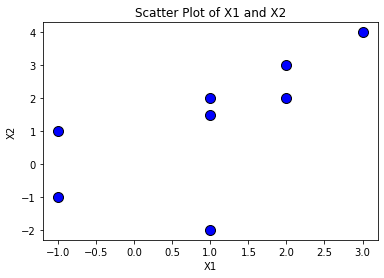

In [20]:
X1 = D[:,0]
X2 = D[:,1]
plt.scatter(x=X1, y=X2, color='blue', marker='o', s=100, edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 and X2')
plt.show()

## Linear Transformation

Treating each row as a 2-dimensional vector, apply the linear transformation $A$ to each row. In other words, let $x_i$ be the $i$-th row of $D$. For each $x_i$, find the matrix-vector product $Ax_i$. 

For example, 
$$
x2 =\begin{pmatrix}
  1 \\ 
  2 
\end{pmatrix}
$$

In [21]:
linearTransformationData = np.ndarray(shape=D.shape)
for row_index, row in enumerate(D):
    dot = np.dot(A, row)
    linearTransformationData[row_index] = [dot[0,0], dot[0,1]]

In [22]:
# print out the transformed data
for index, row in enumerate(linearTransformationData):
    print(f"x{index+1}: ", row)

x1:  [0.1160254  1.79903811]
x2:  [-0.1339746   2.23205081]
x3:  [0.59807621 4.96410162]
x4:  [-0.3660254 -1.3660254]
x5:  [-1.3660254  0.3660254]
x6:  [ 1.8660254  -1.23205081]
x7:  [0.73205081 2.73205081]
x8:  [0.23205081 3.59807621]


## Transformed Data

UsePythontocreateaplotshowingboththeoriginaldataandthetransformed data, with the $x$-axis still corresponding to $X1$ and the $y$-axis corresponding to $X2$. Use different colors and markers to differentiate between the original and transformed data. That is, each transformed data point in the plot should be one matrix-vector product $Ax_i$, which is a $2$-dimensional vector. Each original point in the plot should have the same coordinates as it did in part 2.1.

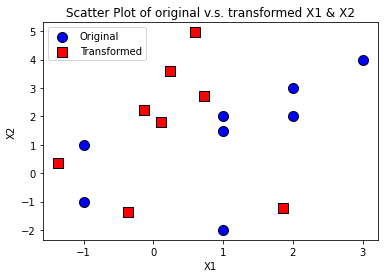

In [23]:
X1_transformend = linearTransformationData[:,0]
X2_transformend = linearTransformationData[:,1]
plt.scatter(x=X1, y=X2, color='blue', marker='o', s=100, edgecolors='black')
plt.scatter(x=X1_transformend, y=X2_transformend, color='red', marker='s', s=100, edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of original v.s. transformed X1 & X2')
plt.legend(['Original', 'Transformed'])
plt.show()

## Multi-Dimensional Mean

Write down the multi-dimensional mean of the data. (Remember that this should be a 2-dimensional vector)

In [24]:
def multiDimensionalMean(m):
    # output array (i.e. mean array)
    mean = [0] * m.shape[1]
    # iterate over columns
    for col_index in range(m.shape[1]):
        # get column array
        col_arr = m[:,col_index]
        # column mean
        col_mean = col_arr.mean()
        # set column mean to mean (output) array
        mean[col_index] = col_mean
    # return multi-dimensional mean
    return mean
multiDimMean = multiDimensionalMean(D)
multiDimMean

[1.0, 1.3125]

## Mean-Centered Data

Mean-center the data. Write down the mean-centered data matrix.

In [25]:
meanCenteredData = np.ndarray(shape=D.shape)
for row_index, row in enumerate(D):
    for row_col_index, value in enumerate(row):
        meanCenteredData[row_index][row_col_index] = value - multiDimMean[row_col_index]
meanCenteredData

array([[ 0.    ,  0.1875],
       [ 0.    ,  0.6875],
       [ 2.    ,  2.6875],
       [-2.    , -2.3125],
       [-2.    , -0.3125],
       [ 0.    , -3.3125],
       [ 1.    ,  0.6875],
       [ 1.    ,  1.6875]])

## Plot of Original v.s. Mean-Centered Data

Use Python to create a scatter plot showing both the original data and the mean-centered data, where the $x$-axis is $X1$ and the $y$-axis is $X2$. Use different colors and markers to differentiate between the original and mean-centered data.

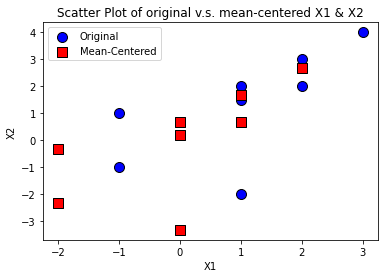

In [26]:
X1_mean_centered = meanCenteredData[:,0]
X2_mean_centered = meanCenteredData[:,1]
plt.scatter(x=X1, y=X2, color='blue', marker='o', s=100, edgecolors='black')
plt.scatter(x=X1_mean_centered, y=X2_mean_centered, color='red', marker='s', s=100, edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of original v.s. mean-centered X1 & X2')
plt.legend(['Original', 'Mean-Centered'])
plt.show()

## Covariance

Write down the covariance matrix of the data matrix $D$. Use estimated covariance.

In [27]:
def covariance(v1, v2 = None):
    if v2 is None: v2 = v1
    # vector 1 mean
    v1_mean = v1.mean()
    # vector 2 mean
    v2_mean = v2.mean()
    # co_var (the covariance between v1 and v2)
    co_var = 0
    # loop through v1 and v2 values
    for i in range(v1.shape[0]):
        co_var += (v1[i] - v1_mean) * (v2[i] - v2_mean)
    # calculate and return the co-variance between v1 and v2
    return (co_var / (v1.shape[0] - 1))

def covarianceMatrix(m):
    # co-variance matrix
    covar_m = np.ndarray((m.shape[1], m.shape[1]))
    # loop through input matrix rows
    for i in range(m.shape[1]):
        # loop through input matrix rows (again)
        for j in range(m.shape[1]):
            # set x_ij covariance value
            covar_m[i, j] = covariance(m[:,i], m[:,j])
    # return the covariance matrix
    return covar_m
covarianceMatrix(D)

array([[2.        , 1.85714286],
       [1.85714286, 3.92410714]])

## Covariance Matrix of Z (Centered Mean)

Write down the covariance matrix of the centered data matrix $Z$. Use estimated covariance.

In [28]:
covarianceMatrix(meanCenteredData)

array([[2.        , 1.85714286],
       [1.85714286, 3.92410714]])

## Covariance Matric of Standard Normalization

Write down the covariance matrix of the data after applying standard normalization.

In [29]:
def zScoreNormalize(m):
    # create normlized matrix based on shape of input matrix
    z_score = np.ndarray(m.shape)
    # loop through input matrix rows
    for row_index in range(m.shape[0]):
        # loop through input matrix columns
        for col_index in range(m.shape[1]):
            # get current column array
            col_arr = m[:,col_index]
            # calculate the standard devieation for the current column
            col_std_div = (covariance(col_arr)) ** (1/2)
            # calculate the column's mean
            col_mean = col_arr.mean()
            # get the x_ij value from the imput matix
            x_ij = m[row_index, col_index]
            # calculate the x_ji z-score
            x_ij_zscore = (x_ij - col_mean) / col_std_div
            # set x_ij normalized value in normalized matrix
            z_score[row_index, col_index] = x_ij_zscore
    # return the normalized array
    return z_score
covarianceMatrix(zScoreNormalize(D))

array([[1.        , 0.66291811],
       [0.66291811, 1.        ]])